# Voter System Proposal Simulation

Joshua Sanz, Robert Wang, Victor Han

In [1]:
# a bit of setup
import networkx as nx
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import animation
import pandas as pd
import scipy.stats as stats


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [20]:
plt.rcParams['figure.figsize'] = 12, 8

In [21]:
er = nx.erdos_renyi_graph(50, 0.15)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


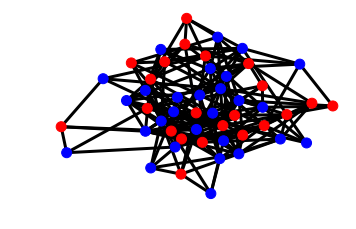

In [22]:
options = {
    'node_color': np.random.choice(["red", "blue"], 50),
    'node_size': 100,
    'width': 3,
}
plt.subplot(221)
nx.draw(er, **options)